In [ ]:
import sys
print(sys.executable)
print(sys.version)
print(sys.version_info)

In [3]:
import seaborn as sns
import pandas as pd
import numpy as np
import scipy as sci
import matplotlib  as plt
import matplotlib.pyplot as pt
from scipy import stats
import sklearn
print(f"matplotlib version:{plt.__version__}")
print(f"numpy version:{np.__version__}")
print(f"pandas version:{pd.__version__}")
print(f"scipy version:{sci.__version__}")
print(f"seaborn version:{sns.__version__}")
print(f"sklearn version:{sklearn.__version__}")

matplotlib version:3.5.2
numpy version:1.21.5
pandas version:1.4.4
scipy version:1.9.1
seaborn version:0.11.2
sklearn version:1.0.2


In [347]:
df  = pd.read_csv('OccupancyTrain.csv',sep=",",header=None,names=["time(sec)","temp(C)","light(lux)","CO2(ppm)","humidity_ratio","occupancy"])

In [348]:
df 

,time(sec),temp(C),light(lux),CO2(ppm),humidity_ratio,occupancy
0,21.290000,21.100000,0.00,592.500000,0.003297,0.0
1,22.100000,26.600000,464.00,1073.250000,0.004375,1.0
2,19.390000,27.200000,0.00,463.000000,0.003783,0.0
3,20.600000,19.500000,0.00,435.000000,0.002919,0.0
4,21.500000,33.500000,475.25,1281.500000,0.005320,1.0
...,...,...,...,...,...,...
595,20.633333,20.633333,0.00,460.000000,0.003096,0.0
596,19.525000,29.675000,0.00,437.250000,0.004164,0.0
597,20.463333,26.230000,69.00,421.666667,0.003899,0.0
598,19.790000,19.290000,0.00,437.000000,0.002746,0.0


In [349]:
df1 = pd.read_csv('IDSWeedCropTrain.csv',sep=",",header=None,names=["feature1","feature2","feature3","feature4","feature5","feature6","feature7","feature8","feature9","feature10","feature11","feature12","feature13","label"])

In [350]:
df1

,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,feature11,feature12,feature13,label
0,0.0,0.0,39.0,1982.0,4705.0,2541.0,534.0,160.0,35.0,4.0,0.0,0.0,0.0,1
1,0.0,0.0,167.0,2063.0,4086.0,2773.0,621.0,218.0,64.0,7.0,1.0,0.0,0.0,1
2,9.0,22.0,297.0,2933.0,4192.0,2061.0,363.0,93.0,30.0,0.0,0.0,0.0,0.0,1
3,0.0,0.0,134.0,2521.0,4244.0,1325.0,527.0,432.0,645.0,154.0,18.0,0.0,0.0,0
4,0.0,6.0,54.0,1258.0,2277.0,2116.0,995.0,1288.0,1251.0,452.0,255.0,48.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,4.0,128.0,1762.0,4841.0,2248.0,770.0,174.0,40.0,22.0,11.0,0.0,0.0,0.0,1
996,1.0,38.0,2450.0,4675.0,2261.0,504.0,56.0,13.0,2.0,0.0,0.0,0.0,0.0,1
997,0.0,9.0,82.0,1195.0,2940.0,2208.0,1231.0,1015.0,855.0,328.0,137.0,0.0,0.0,0
998,0.0,5.0,104.0,2949.0,4868.0,1840.0,202.0,31.0,1.0,0.0,0.0,0.0,0.0,1


In [353]:
#check occupancy counts

In [352]:
df.occupancy.value_counts()

0.0    300
1.0    300
Name: occupancy, dtype: int64

In [203]:
df.columns

Index(['time(sec)', 'temp(C)', 'light(lux)', 'CO2(ppm)', 'humidity_ratio',
       'occupancy'],
      dtype='object')

In [354]:
use_col=['time(sec)', 'temp(C)', 'light(lux)', 'CO2(ppm)', 'humidity_ratio']

In [355]:
X = df.iloc[:,0:5]

In [356]:
X

,time(sec),temp(C),light(lux),CO2(ppm),humidity_ratio
0,21.290000,21.100000,0.00,592.500000,0.003297
1,22.100000,26.600000,464.00,1073.250000,0.004375
2,19.390000,27.200000,0.00,463.000000,0.003783
3,20.600000,19.500000,0.00,435.000000,0.002919
4,21.500000,33.500000,475.25,1281.500000,0.005320
...,...,...,...,...,...
595,20.633333,20.633333,0.00,460.000000,0.003096
596,19.525000,29.675000,0.00,437.250000,0.004164
597,20.463333,26.230000,69.00,421.666667,0.003899
598,19.790000,19.290000,0.00,437.000000,0.002746


In [357]:
#prepare the target
target = df.iloc[:,5]

In [358]:
target

0      0.0
1      1.0
2      0.0
3      0.0
4      1.0
      ... 
595    0.0
596    0.0
597    0.0
598    0.0
599    1.0
Name: occupancy, Length: 600, dtype: float64

#### Exercise 1 (Performing PCA).

a) Implement PCA. You might want to use the supplied template function pca.py, especially for its comments. Your function should return i) unit vectors spanning the principal components, and ii) the variance captured by each of these components, where the principal components are sorted so that the variance is monotonically decreasing.

### PCA

In [701]:
def PCA(X):
    ''' Princiapal component analysis function 
     Returns: sorted_eigenvalue , sorted_eigenvectors
    '''
    covar_cal = np.cov(X , rowvar = False)
    eigenvalues , eigenvectors = np.linalg.eigh(covar_cal)
    sorted_index = np.argsort(eigenvalues)[::-1]
    order_eigenvalue = eigenvalues[sorted_index]
    order_eigenvectors = eigenvectors[:,sorted_index]    
    return order_eigenvalue , order_eigenvectors

The implementation of the PCA function includes calculating variance matrix which indicates  how much the variables vary together, computing eigenvalues and eigenvectors from Cov (X, X), sorting the eigenvwtors associate with their eigenvalues in descending order, then returning sorted eigenvalue and sorted eigenvectors.

b) Perform PCA on the occupancy dataset OccupancyTrain.csv. This is a modified version of the one used in the previous assignment (see description in Appendix). Make a plot of variance versus PC index, where you should see the variance stabilizing at a low level (capturing primarily noise) for larger PC indices (your y axis should be the variances found from PCA).

In [403]:
pca_occupancy = PCA(X)

In [360]:
pca_occupancy

(array([1.84318086e+05, 2.29215562e+04, 1.82445114e+01, 3.67002769e-01,
        1.17320088e-09]),
 array([[-1.65865090e-03,  2.28761842e-03,  6.48058415e-02,
         -9.97893866e-01, -2.25893305e-04],
        [-6.73723437e-03, -1.83193540e-02, -9.97705762e-01,
         -6.48243895e-02, -1.49505981e-04],
        [-4.18564950e-01,  9.08077508e-01, -1.39687100e-02,
          1.87027297e-03,  1.39221784e-07],
        [-9.08160361e-01, -4.18395038e-01,  1.37212550e-02,
          1.44144621e-03, -2.03201250e-07],
        [-1.50820098e-06, -2.43353795e-06, -1.34519045e-04,
         -2.35109153e-04,  9.99999963e-01]]))

In [361]:
pca_occupancy[1] #take sorted_eigenvectors

array([[-1.65865090e-03,  2.28761842e-03,  6.48058415e-02,
        -9.97893866e-01, -2.25893305e-04],
       [-6.73723437e-03, -1.83193540e-02, -9.97705762e-01,
        -6.48243895e-02, -1.49505981e-04],
       [-4.18564950e-01,  9.08077508e-01, -1.39687100e-02,
         1.87027297e-03,  1.39221784e-07],
       [-9.08160361e-01, -4.18395038e-01,  1.37212550e-02,
         1.44144621e-03, -2.03201250e-07],
       [-1.50820098e-06, -2.43353795e-06, -1.34519045e-04,
        -2.35109153e-04,  9.99999963e-01]])

In [416]:
def reduce_method(X , n_components): 
    ''' Transform the original data into n components
        Returns: reduced to n components      
    '''
    covar_cal = np.cov(X , rowvar = False)
    eigenvalues , eigenvectors = np.linalg.eigh(covar_cal)    
    sorted_index = np.argsort(eigenvalues)[::-1]
    order_eigenvalue = eigenvalues[sorted_index]
    order_eigenvectors = eigenvectors[:,sorted_index]
    eigenvector_subset = order_eigenvectors[:,0:n_components]
    reduction = np.dot(eigenvector_subset.transpose() , X.transpose() ).transpose()     
    return reduction

In [417]:
pca_occupancy = reduce_method(X,5)

In [418]:
#Creating a Pandas DataFrame of pca
occupancy_pca_df = pd.DataFrame(pca_occupancy , columns = ['PC1','PC2','PC3','PC4','PC5'])

In [419]:
#Concat it with label
occupancy_pca_df = pd.concat([occupancy_pca_df , pd.DataFrame(target)] , axis = 1)

<AxesSubplot:xlabel='PC1', ylabel='PC2'>

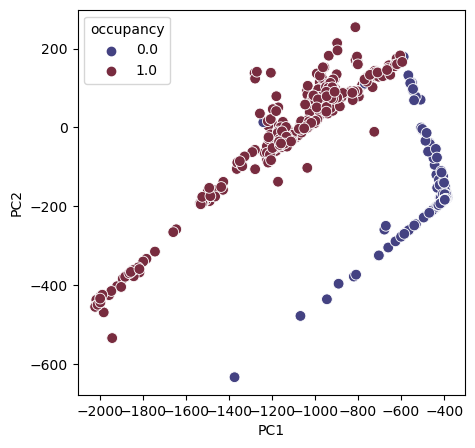

In [420]:
#plot
pt.figure(figsize = (5,5))
sns.scatterplot(data = occupancy_pca_df , x = 'PC1',y = 'PC2' , s = 60 , palette= 'icefire',hue = 'occupancy')

b) Perform PCA on the occupancy dataset OccupancyTrain.csv. This is a modified version of the one used in the previous assignment (see description in Appendix). Make a plot of variance versus PC index, where you should see the variance stabilizing at a low level (capturing primarily noise) for larger PC indices (your y axis should be the variances found from PCA).

In [404]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler # z-score

In [405]:
X_t = X
max_components = min(X.shape)

In [406]:
max_components

5

In [407]:
x=np.arange(1, 5+1)
x

array([1, 2, 3, 4, 5])

In [408]:
pca = PCA(n_components=max_components)
pca.fit_transform(X_t)

array([[-2.53614503e+02,  1.50746855e+02, -5.93428191e+00,
         6.51882405e-01, -3.94514348e-05],
       [ 3.77236125e+02, -6.93587909e+01, -6.14404695e-01,
         2.55928909e-01,  2.55417264e-07],
       [-3.71183324e+02,  9.66807918e+01,  2.05175692e+00,
        -6.62019766e-01, -1.05328079e-05],
       ...,
       [-3.79844393e+02,  1.67095570e+01,  2.54541028e+00,
         2.76704295e-01,  2.67862295e-05],
       [-3.94848122e+02,  8.56566997e+01, -5.50926550e+00,
        -7.38145783e-01,  4.99084112e-05],
       [ 1.16709514e+02, -1.88102122e+02, -2.87398693e+00,
        -1.30836539e-01, -3.11154658e-05]])

In [413]:
def scree_plot(X, n_components, with_cumulative=False, show_data_label=False, figsize=(10, 7)):
    '''
    PCA scree plot with cumulative
    '''
    scaler = StandardScaler()
    #X_t=scaler.fit_transform(X)
    X_t = (X)
    max_components = min(X.shape)
    x=np.arange(1, n_components+1)
    pca = PCA(n_components=max_components)
    pca.fit_transform(X_t)
    y1=pca.explained_variance_ratio_[:n_components]
    y2=np.cumsum(pca.explained_variance_ratio_)[:n_components]
    
    pt.figure(figsize=figsize)
    
    if n_components > 20:
        marker = None
    else:
        marker = 'o'
    if with_cumulative:
        pt.plot(x, y2, linestyle='--', marker=marker, label='cumulative', color='salmon')
        
    pt.plot(x, y1, linestyle='-', marker=marker, label='individual', color='deepskyblue')
    pt.title('explained variance ratio')
    pt.xlabel('Number of components')
    pt.ylabel('proportion of variance explained')
    pt.legend()
    if with_cumulative:
        [pt.axhline(y=xl, color='.7', linestyle='--') for xl in [.8, .9, .95, 1]]
    pt.grid(axis='x')

    if show_data_label:
        for n, v, cv in zip(np.nditer(x, flags=['refs_ok']), 
                            np.nditer(y1, flags=['refs_ok']),
                            np.nditer(y2, flags=['refs_ok'])):
                pt.text(n+.02, v+.02, f'{v*100:.2f}%', fontsize=10)
                if with_cumulative:
                    pt.text(n+.02, cv+.02, f'{cv*100:.2f}%', fontsize=10)

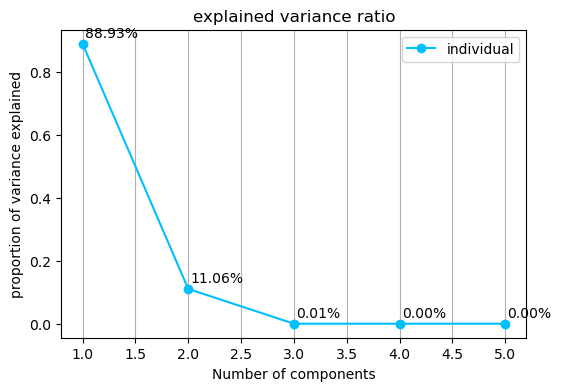

In [414]:
scree_plot(X, 5, False, True,(6,4))

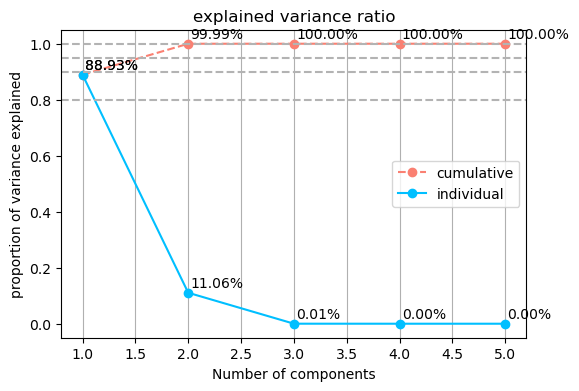

In [415]:
scree_plot(X, 5, True, True,(6,4))

From the plot of occupancy data, the first component(PC1) can capture variance 88.93% and PC2 can explain variance 11.06%, so making use of PC1 and PC2 cover 99.99% of variance in this data set.

c) Perform PCA on the pesticide dataset IDSWeedCropTrain.csv (see description in the Appendix below). Again, make a plot of variance versus PC index.
Next, plot the cumulative variance versus the index of the PCs, sorted by the amount of variance they capture. You can determine the cumulative variance by dividing the eigenvalues by their sum and then calculating their cumulative sum. This way you capture how large a proportion of the variance is described by the first, second, etc Principal Component (PC).

In [ ]:
def PCA(X):
    ''' Princiapal component analysis function 
     Returns: sorted_eigenvalue , sorted_eigenvectors
    '''
    covar_cal = np.cov(X , rowvar = False)
    eigenvalues , eigenvectors = np.linalg.eigh(covar_cal)
    sorted_index = np.argsort(eigenvalues)[::-1]
    order_eigenvalue = eigenvalues[sorted_index]
    order_eigenvectors = eigenvectors[:,sorted_index]    
    return order_eigenvalue , order_eigenvectors

In [700]:
def reduce_method(X , n_components): 
    ''' Transform the original data into n components
        Returns: reduced to n components      
    '''
    covar_cal = np.cov(X , rowvar = False)
    eigenvalues , eigenvectors = np.linalg.eigh(covar_cal)    
    sorted_index = np.argsort(eigenvalues)[::-1]
    order_eigenvalue = eigenvalues[sorted_index]
    order_eigenvectors = eigenvectors[:,sorted_index]
    eigenvector_subset = order_eigenvectors[:,0:n_components]
    reduction = np.dot(eigenvector_subset.transpose() , X.transpose() ).transpose()     
    return reduction

The reduce method function works by taking input data X and then choosing the first n eigenvectors, which will be new components. The resulting reduction matrix can be thought of as a lower-dimensional representation of the original data, where each row corresponds to a data point and each column corresponds to a feature or variable. The columns of reduction are weighted combinations of the columns of X that capture the most important directions of variation in the data, as determined by the chosen subset of eigenvectors. The transformation process is done by dot product projection.

In [430]:
weed_train = np.loadtxt('IDSWeedCropTrain.csv', delimiter=',')
weed_test = np.loadtxt('IDSWeedCropTest.csv', delimiter= ',')
X_weed_train = weed_train[:,:-1]
y_weed_train = weed_train[:,-1]
X_weed_test = weed_train[:,:-1]
y_weed_test = weed_train[:,-1]

In [431]:
target = weed_train[:,-1]

In [432]:
pca_weed = reduce_method(X_weed_train,min(X_weed_train.shape))  #call a pca function
#Creating a Pandas DataFrame of pca
weed_pca_df = pd.DataFrame(pca_weed , columns = ['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11','PC12','PC13' ])

In [433]:
#Concat it with label
weed_pca_df = pd.concat([weed_pca_df , pd.DataFrame(target)] , axis = 1)

<AxesSubplot:xlabel='PC1', ylabel='PC2'>

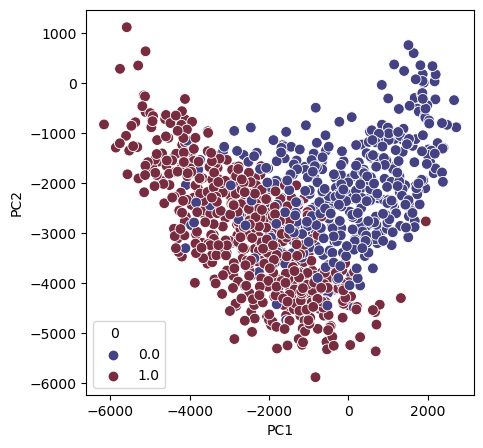

In [437]:
#plot
pt.figure(figsize = (5,5))
sns.scatterplot(data = weed_pca_df , x = 'PC1',y = 'PC2' , s = 60 , palette= 'icefire',hue =weed_pca_df[0])

d) How many PCs (dimensions) do you need to capture 90% of the variance in your dataset? How many do you need to capture 95%?

In [438]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler # z-score

In [444]:
def scree_plot(X, n_components, with_cumulative=False, show_data_label=False, figsize=(10, 7)):
    '''
    PCA scree plot with cumulative
    '''
    scaler = StandardScaler()
    X_t = X
    max_components = min(X.shape)
    x=np.arange(1, n_components+1)
    pca = PCA(n_components=max_components)
    pca.fit_transform(X_t)
    y1=pca.explained_variance_ratio_[:n_components]
    y2=np.cumsum(pca.explained_variance_ratio_)[:n_components]
    
    pt.figure(figsize=figsize)
    
    if n_components > 20:
        marker = None
    else:
        marker = 'o'
    if with_cumulative:
        pt.plot(x, y2, linestyle='--', marker=marker, label='cumulative', color='salmon')
        
    pt.plot(x, y1, linestyle='-', marker=marker, label='individual', color='deepskyblue')
    pt.title('explained variance ratio')
    pt.xlabel('Number of components')
    pt.ylabel('proportion of variance explained')
    pt.legend()
    if with_cumulative:
        [pt.axhline(y=xl, color='.7', linestyle='--') for xl in [.8, .9, .95, 1]]
    pt.grid(axis='x')

    if show_data_label:
        for n, v, cv in zip(np.nditer(x, flags=['refs_ok']), 
                            np.nditer(y1, flags=['refs_ok']),
                            np.nditer(y2, flags=['refs_ok'])):
                pt.text(n+.02, v+.02, f'{v*100:.2f}%', fontsize=10)
                if with_cumulative:
                    pt.text(n+.02, cv+.02, f'{cv*100:.2f}%', fontsize=10)

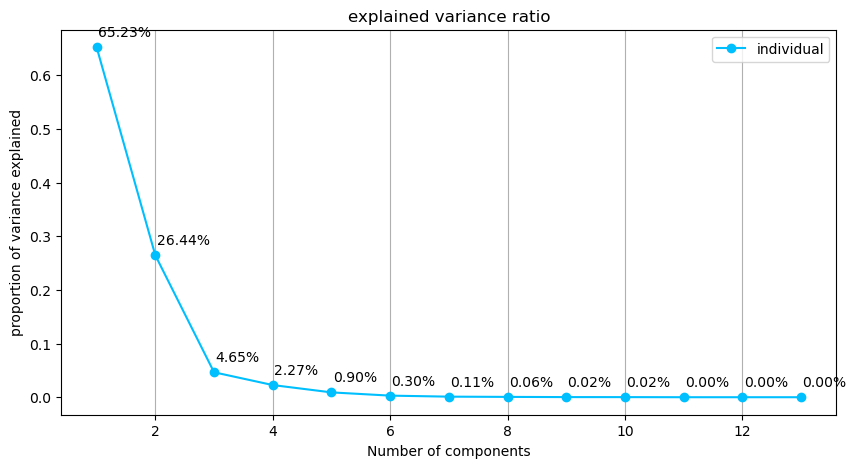

In [447]:
scree_plot(X_weed_train, 13, False, True,(10,5))

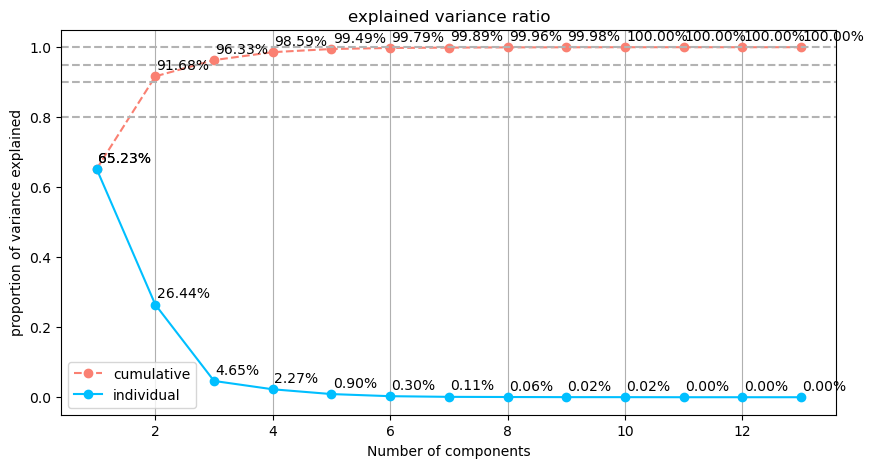

In [446]:
scree_plot(X_weed_train, 13, True, True,(10,5))

According to the plot of variance versus PC and cumulative variance versus PC for pesticide, the first component (PC1) can capture variance 65.23% of this data set, the second PC can capture 26.44% so in order to explain 90% of variance for pesticide dataset, we need at least PC1 and PC2 while using 3 components (PC1, PC2 and PC3) are required to explain 95% of the variance.

Deliverables. a) Description of your implementation b) the plot of variance versus PC for occupancy; c) 2 plots, one plot of variance versus PC for pesticide and one plot of cumulative variance versus PC for pesticide, d) the numbers of dimensions needed to capture 90% and 95% for pesticide.


#### Exercise 2 (Visualization in 2D). 
2D-projection is the process of visualizing a dataset in 2D while preserving pairwise distances between data points as well as possible. A classical way to do this is by projecting data points onto the first 2 principal components of the dataset.


a) Write a function to project the Pesticide training dataset onto the first 2 principal components. Produce a plot of the training dataset. If you have not completed exercise 1, you may use a built-in PCA package from e.g. scikit-learn to display the projected data.


<AxesSubplot:xlabel='PC1', ylabel='PC2'>

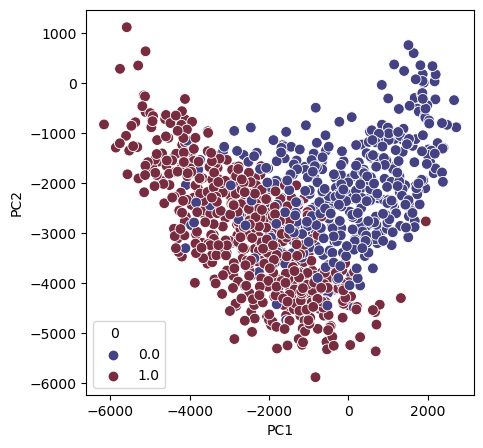

In [452]:
#plot
pt.figure(figsize = (5,5))
sns.scatterplot(data = weed_pca_df , x = 'PC1',y = 'PC2' , s = 60 , palette= 'icefire',hue =weed_pca_df[0])

b) Use/modify your function (or the scikit-lean code) to project the Occupancy training dataset on the first 2 principal components. Plot the projected data as PC1 versus PC2.

<AxesSubplot:xlabel='PC1', ylabel='PC2'>

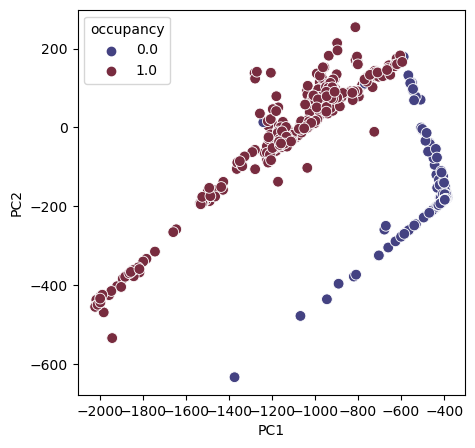

In [448]:
#plot
pt.figure(figsize = (5,5))
sns.scatterplot(data = occupancy_pca_df , x = 'PC1',y = 'PC2' , s = 60 , palette= 'icefire',hue = 'occupancy')

Deliverables. a) Description of your implementation and b) the plot.

#### Critical thinking
#### Exercise 3.
In the occupancy dataset there are features such as humidity which is on a 100 scale, and there are features such as time which is on a 10.000 scale.
Assume that you perform 2 preprocessing steps prior to performing PCA with the covariance matrix. i) Centering
ii) Normalization
Will applying these preprocessing steps make a difference or not? You do not need to implement this. Discuss the effect of centering and normalization and if it is meaningful before doing PCA with the covariance matrix.
Deliverables. Two short discussions (one for centering and one for normalization).

The implementation of these preprocessing steps will make a difference in the outcome:\
i) Centering\
Without data centering, the initial principal component might not pass through the origin, and the following components might not be orthogonal to one another. The principal components might not accurately represent the underlying structure of the data, which can lead to outputs that are inaccurate. Centering the data can also benefit in minimizing any biases or errors that could be presented. We would like to have the pca results theat completely based on the underlying patterns in the data.

ii) Normalization\
Data normalization makes sure that each variable is given equal weight in defining the principal components. One variable could dominate the analysis and bias the results if it has a considerably wider range of values than the others. By normalization the data, we can also make sure that variations in the scale of the original data have no impact on the major components that are produced.

#### Exercise 4 (Clustering II).
Visualize the data in IDSWeedCropTrain.csv by projecting it onto its first two principal components (as in Exercise 2). Colour the data points according to their class. Take the cluster centers you found in Exercise 3 from Assignment 3 (2-means clustering of the input data in IDSWeedCropTrain.csv, the cluster centres initialized with the first two data points). Then project the centers onto the first two principal components found in the previous step and visualize them together with the data points (i.e., in the same plot). Briefly discuss whether you got meaningful clusters.
Deliverables. a) Projection of the two cluster centers (i.e., two two-dimensional vectors); b) a 2D plot visualizing the data and the cluster centers; c) short discussion of results

In [453]:
weed_train = np.loadtxt('IDSWeedCropTrain.csv', delimiter=',')
weed_test = np.loadtxt('IDSWeedCropTest.csv', delimiter= ',')
X_weed_train = weed_train[:,:-1]
y_weed_train = weed_train[:,-1]
X_weed_test = weed_train[:,:-1]
y_weed_test = weed_train[:,-1]

In [454]:
target = weed_train[:,-1]

In [455]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=2)
model

KMeans(n_clusters=2)

In [456]:
model.fit(X_weed_train)

KMeans(n_clusters=2)

In [457]:
model.cluster_centers_

array([[5.70726496e+00, 4.93012821e+01, 7.92408120e+02, 3.85595940e+03,
        3.38821368e+03, 1.35652778e+03, 2.91737179e+02, 1.29989316e+02,
        6.86111111e+01, 3.81880342e+01, 1.87692308e+01, 4.13461538e+00,
        4.42307692e-01],
       [2.19924812e+00, 1.40018797e+01, 1.73727444e+02, 1.40094549e+03,
        3.18759962e+03, 2.62043985e+03, 1.00147368e+03, 6.31413534e+02,
        4.95295113e+02, 2.95238722e+02, 1.45689850e+02, 2.91466165e+01,
        2.82330827e+00]])

In [458]:
def PCA(X):
    ''' Princiapal component analysis function 
     Returns: sorted_eigenvalue , sorted_eigenvectors
    '''
    covar_cal = np.cov(X , rowvar = False)
    eigenvalues , eigenvectors = np.linalg.eigh(covar_cal)
    sorted_index = np.argsort(eigenvalues)[::-1]
    order_eigenvalue = eigenvalues[sorted_index]
    order_eigenvectors = eigenvectors[:,sorted_index]    
    return order_eigenvalue , order_eigenvectors

In [459]:
vector = PCA(X_weed_train)[1]

In [460]:
vector

array([[-7.67256658e-04,  1.56747940e-03,  4.00710534e-03,
        -1.28772185e-02,  8.01248926e-03, -4.28264633e-03,
         1.16625500e-03, -4.53686916e-04,  1.74965178e-01,
        -8.94518685e-02,  8.97235576e-01, -2.80383488e-01,
         2.78334221e-01],
       [-8.79683019e-03,  1.40769369e-02,  2.87907682e-02,
        -8.82120259e-02,  5.09443832e-02, -1.92239196e-02,
         1.54076870e-02, -4.44897257e-03,  8.27453312e-01,
        -3.78360250e-01, -2.88394943e-01, -4.20494871e-03,
         2.77249561e-01],
       [-1.87996313e-01,  2.14099194e-01,  3.36241589e-01,
        -7.43904477e-01,  3.26403904e-01,  4.65813885e-02,
        -7.94858936e-02,  3.01475012e-02, -2.26881019e-01,
         1.19422458e-02, -7.21773102e-02, -5.21952031e-02,
         2.77270469e-01],
       [-8.03513454e-01,  1.29781161e-01,  1.81115490e-01,
         4.00679258e-01, -1.77258363e-01,  1.17901866e-01,
        -3.52553217e-02,  3.40722426e-02, -9.66949182e-02,
        -3.43566857e-02, -8.02711089e

In [461]:
vector[:,0:2]

array([[-7.67256658e-04,  1.56747940e-03],
       [-8.79683019e-03,  1.40769369e-02],
       [-1.87996313e-01,  2.14099194e-01],
       [-8.03513454e-01,  1.29781161e-01],
       [-1.35700352e-01, -8.77157133e-01],
       [ 4.07392596e-01, -2.24983769e-01],
       [ 2.65003835e-01,  1.53239230e-01],
       [ 1.84653773e-01,  1.90063790e-01],
       [ 1.47381168e-01,  1.93273312e-01],
       [ 8.21971010e-02,  1.25043587e-01],
       [ 4.11559718e-02,  6.55855112e-02],
       [ 8.12708086e-03,  1.39608482e-02],
       [ 8.63682502e-04,  1.44702874e-03]])

In [462]:
project_center = np.dot(model.cluster_centers_,vector[:,0:2])

In [463]:
project_center

array([[-3039.49368092, -2517.66768068],
       [  -37.98660506, -2750.28531206]])

In [464]:
project_center[0]

array([-3039.49368092, -2517.66768068])

In [465]:
project_center[1]

array([  -37.98660506, -2750.28531206])

In [466]:
def reduce_component(X , num_components):
    cov_mat = np.cov(X , rowvar = False)
    eigen_values , eigen_vectors = np.linalg.eigh(cov_mat)
    sorted_index = np.argsort(eigen_values)[::-1]
    sorted_eigenvalue = eigen_values[sorted_index]
    sorted_eigenvectors = eigen_vectors[:,sorted_index]
    eigenvector_subset = sorted_eigenvectors[:,0:num_components]
    reduce_comp = np.dot(eigenvector_subset.transpose() , X.transpose() ).transpose()
    return reduce_comp

In [467]:
mat_reduced = reduce_component(X_weed_train,2)

In [468]:
mat_reduced

array([[-1026.63731227, -4313.62724318],
       [ -898.94477591, -3754.54508623],
       [-2024.16940914, -3617.07487188],
       ...,
       [  197.12358669, -2306.03438784],
       [-2240.74129191, -4241.87013899],
       [ -366.20853349, -5253.41055855]])

In [473]:
pc_df = pd.DataFrame(mat_reduced , columns = ['PC1','PC2'])

In [474]:
pc_df = pd.concat([pc_df , pd.DataFrame(target)] , axis = 1)

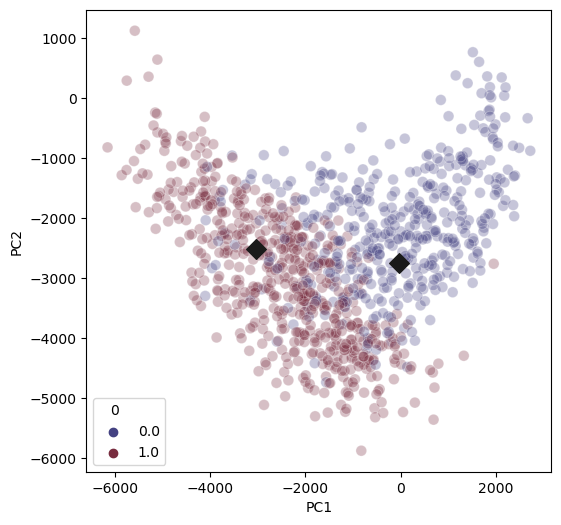

In [475]:
pt.figure(figsize = (6,6))
sns.scatterplot(data = pc_df , x = 'PC1',y = 'PC2' , s = 60 , palette= 'icefire',hue=principal_df[0],alpha=0.3)
pt.scatter(project_center[:,0], project_center[:,1], color='.1', marker='D',s=100)

The cluster centers on two-dimensional vectors (PC1 and PC2), and when we plot the black dots of the data center onto clusters, we can see two groups disposed by color. Overall, most of the data points can be classified into groups based on a two-dimensional plot, but some of them are still overlapping, so for this data set, it requires a higher dimension to classify clusters.

#### Exercise 5 (Clustering III).
Perform 2-means clustering on the OccupancyTrain.csv and report the center values as you did with the crop dataset. Initialize your 2-means the same way (first two datapoints). Visualize the data in OccupancyTrain.csv by projecting it onto its first two principal components. Colour the data points according to their class. Take the centers you found above and project them onto the first two principal components found in the previous step and visualize them together with the data points (i.e., in the same plot). Briefly discuss whether you got meaningful cluster centers.
Deliverables. a) projection of the two cluster centers (i.e., two two-dimensional vectors); b) a 2D plot visualizing the data and the cluster centers; c) short discussion of results


In [702]:
df  = pd.read_csv('OccupancyTrain.csv',sep=",",header=None,names=["time(sec)","temp(C)","light(lux)","CO2(ppm)","humidity_ratio","occupancy"])

In [703]:
df

,time(sec),temp(C),light(lux),CO2(ppm),humidity_ratio,occupancy
0,21.290000,21.100000,0.00,592.500000,0.003297,0.0
1,22.100000,26.600000,464.00,1073.250000,0.004375,1.0
2,19.390000,27.200000,0.00,463.000000,0.003783,0.0
3,20.600000,19.500000,0.00,435.000000,0.002919,0.0
4,21.500000,33.500000,475.25,1281.500000,0.005320,1.0
...,...,...,...,...,...,...
595,20.633333,20.633333,0.00,460.000000,0.003096,0.0
596,19.525000,29.675000,0.00,437.250000,0.004164,0.0
597,20.463333,26.230000,69.00,421.666667,0.003899,0.0
598,19.790000,19.290000,0.00,437.000000,0.002746,0.0


In [704]:
X = df.iloc[:,0:5]

In [705]:
model = KMeans(n_clusters=2)
model

KMeans(n_clusters=2)

In [706]:
model.fit(X)

KMeans(n_clusters=2)

In [707]:
model.cluster_centers_

array([[2.18266607e+01, 2.73984652e+01, 4.58024161e+02, 1.08964275e+03,
        4.43437128e-03],
       [2.03243556e+01, 2.46537811e+01, 5.75966874e+01, 4.74787474e+02,
        3.62013593e-03]])

In [708]:
vector = PCA(X)[1]

In [709]:
vector[:,0:2]

array([[-1.65865090e-03,  2.28761842e-03],
       [-6.73723437e-03, -1.83193540e-02],
       [-4.18564950e-01,  9.08077508e-01],
       [-9.08160361e-01, -4.18395038e-01],
       [-1.50820098e-06, -2.43353795e-06]])

In [710]:
project_center = np.dot(model.cluster_centers_,vector[:,0:2])

In [711]:
project_center

array([[-1181.50400195,   -40.43167093],
       [ -455.49092781,  -146.75161398]])

In [485]:
re = reduce(X,2)

In [487]:
re

array([[ -538.26248229,  -248.23689505],
       [-1169.11311081,   -28.13124948],
       [ -420.69366122,  -194.17083216],
       ...,
       [ -412.03259298,  -114.19959739],
       [ -397.02886376,  -183.14674002],
       [ -908.58649957,    90.61208143]])

In [488]:
pr = pd.DataFrame(re , columns = ['PC1','PC2'])
target = df.iloc[:,5]

In [494]:
#Creating a Pandas DataFrame 
pr = pd.DataFrame(re, columns = ['PC1','PC2'])

In [493]:
#Concat it with label
pr = pd.concat([pr , pd.DataFrame(target)] , axis = 1)

In [491]:
pr

,PC1,PC2,occupancy
0,-538.262482,-248.236895,0.0
1,-1169.113111,-28.131249,1.0
2,-420.693661,-194.170832,0.0
3,-395.215301,-182.311944,0.0
4,-1362.991853,-105.173920,1.0
...,...,...,...
595,-417.927001,-192.792506,0.0
596,-397.325430,-183.442191,0.0
597,-412.032593,-114.199597,0.0
598,-397.028864,-183.146740,0.0


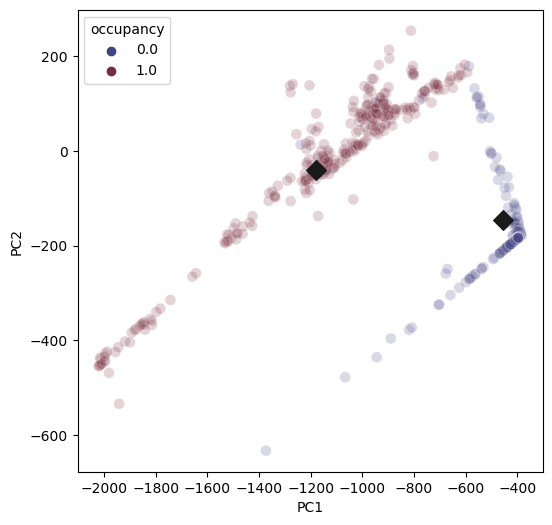

In [492]:
pt.figure(figsize = (6,6))
sns.scatterplot(data = pr , x = 'PC1',y = 'PC2' , s = 60 , palette= 'icefire',hue='occupancy',alpha=0.2)
pt.scatter(project_center[:,0], project_center[:,1], color='.1', marker='D',s=100)

The cluster centers on two-dimensional vectors (PC1 and PC2), and when we plot the black dots of the data center onto clusters, we can see two groups disposed by color. PCA can reduce dataset into two features, and it can be able to explain variance of occupancy data.

#### Linear regression

#### Exercise 6 (Linear Regression). 
Your task is to use linear regression to predict the occupancy of buildings (0=not occupied, 1=occupied) based on its properties (humidity, temperature, light etc). You are going to learn a linear model

t=f(x,w)=w0 +w1x1 +w2x2 +...+wDxD =wTx,
where t is the predicted output variable (occupancy), x = (1, x1, x2, . . . , xD)T is the vector-valued input variable (properties), and w = (w0,w1,...,wD) are the free parameters. The parameters wi define the regression model, and once they have been estimated, the model can be used to predict outputs for new input values x0.


a) Implement linear regression. Call your function multivarlinreg(); a template is provided in the multivarlinreg.py file. Your code should load the data matrix X containing the input variables, as well as the output vector t, and output an estimate of the free parameters in the model, that is, the wi in the form of the vector w. Remember the offset parameter w0. You should not use a built-in function for regression.

In [148]:
df  = pd.read_csv('OccupancyTrain.csv',sep=",",header=None,names=["time(sec)","temp(C)","light(lux)","CO2(ppm)","humidity_ratio","occupancy"])

In [149]:
df

,time(sec),temp(C),light(lux),CO2(ppm),humidity_ratio,occupancy
0,21.290000,21.100000,0.00,592.500000,0.003297,0.0
1,22.100000,26.600000,464.00,1073.250000,0.004375,1.0
2,19.390000,27.200000,0.00,463.000000,0.003783,0.0
3,20.600000,19.500000,0.00,435.000000,0.002919,0.0
4,21.500000,33.500000,475.25,1281.500000,0.005320,1.0
...,...,...,...,...,...,...
595,20.633333,20.633333,0.00,460.000000,0.003096,0.0
596,19.525000,29.675000,0.00,437.250000,0.004164,0.0
597,20.463333,26.230000,69.00,421.666667,0.003899,0.0
598,19.790000,19.290000,0.00,437.000000,0.002746,0.0


In [150]:
df.corr()['occupancy']

time(sec)         0.683533
temp(C)           0.176680
light(lux)        0.957500
CO2(ppm)          0.713902
humidity_ratio    0.360082
occupancy         1.000000
Name: occupancy, dtype: float64

In [151]:
df_np = df.to_numpy()  #check the shape of the data set
df_np.shape

(600, 6)

In [152]:
X_train, y_train = df_np[:, :5], df_np[:, -1]
X_train.shape, y_train.shape

((600, 5), (600,))

In [9]:
# Model: y_hat[i] = w0 + (w1* x_1[i]) + (w2* x_2[i]) + (w3* x_3[i])+ (w4* x_4[i])+ (w5* x_5[i])

In [92]:
from numpy.linalg import inv

In [176]:
def multivarlinreg(X, y):
    '''
    load the data matrix X containing the input variables, as well as the 
    Returns: output vector t, and output an estimate of the free parameters in the model, 
    that is, the wi in the form of the vector w.
    '''
    row = X.shape[0]
    col = X.shape[1]+1
    offset_X = np.ones(shape=(row, col))
    offset_X[:, 1:] = X
    t = np.dot(np.dot(inv(np.dot(offset_X.T, offset_X)), offset_X.T), y)
    return t

In [177]:
def get_predict(w, X):
    '''
    return prediction
    '''
    row = X.shape[0]
    col = X.shape[1]+1
    offset_X = np.ones(shape=(row, col))
    offset_X[:, 1:] = X

    return np.dot(offset_X, w)

b) Run your regression function on the training set by using only the last column (the humidity ratio) and report your estimated parameters w0 (the offset parameter) and w1. What do you see?

In [145]:
X_train_humid, y_train = df_np[:, 4], df_np[:, -1]
X_train_humid.shape, y_train.shape

((600,), (600,))

In [141]:
def multivarlinregforone(X, y):
    '''
    load the data matrix X containing the input variables, as well as the 
    Returns: output vector t, and output an estimate of the free parameters in the model, 
    that is, the wi in the form of the vector w.
    '''
    row = X.shape[0]
    col = 1+1
    offset_X = np.ones(shape=(row, col))
    offset_X[:, 1] = X
    t = np.dot(np.dot(inv(np.dot(offset_X.T, offset_X)), offset_X.T), y)
    return t

In [142]:
w_for_humid = multivarlinregforone(X_train_humid, y_train)

In [143]:
w_for_humid 

array([ -0.25648693, 189.24482085])

In [153]:
w = multivarlinreg(X_train, y_train)

In [154]:
w

array([ 4.10465376e+00, -2.02165029e-01, -9.77776912e-02,  2.20119194e-03,
        2.63916765e-05,  6.56590629e+02])

In [109]:
w = multivarlinreg(X_train, y_train)
df['Predictions'] = get_predict(w, X_train)
df

,time(sec),temp(C),light(lux),CO2(ppm),humidity_ratio,occupancy,Predictions
0,21.290000,21.100000,0.00,592.500000,0.003297,0.0,-0.081947
1,22.100000,26.600000,464.00,1073.250000,0.004375,1.0,0.958403
2,19.390000,27.200000,0.00,463.000000,0.003783,0.0,0.021010
3,20.600000,19.500000,0.00,435.000000,0.002919,0.0,-0.038614
4,21.500000,33.500000,475.25,1281.500000,0.005320,1.0,1.055541
...,...,...,...,...,...,...,...
595,20.633333,20.633333,0.00,460.000000,0.003096,0.0,-0.039374
596,19.525000,29.675000,0.00,437.250000,0.004164,0.0,0.001550
597,20.463333,26.230000,69.00,421.666667,0.003899,0.0,0.126313
598,19.790000,19.290000,0.00,437.000000,0.002746,0.0,0.031944


In [112]:
RMSE = RMSE(df['occupancy'], df['Predictions'])

In [113]:
RMSE

0.13209539675596055

In [61]:
RMSE = RMSE(df_test['occupancy'], df_test['predic'])

In [62]:
RMSE

0.18293594439571195

In [94]:
import math

In [216]:
def RMSE(y, y_pred):
  """
  Get the mean squared error
  Returns:THe mean squared error
  """
  MSE = np.square(np.subtract(y,y_pred)).mean() 
  RMSE = math.sqrt(MSE)
  return RMSE

b) Build the regression model for the input variables using the last column of the training set as in 6b). Use the last column of the test set to compute the RMSE of this model. How good is the model?

In [207]:
df_test  = pd.read_csv('OccupancyTest.csv',sep=",",header=None,names=["time(sec)","temp(C)","light(lux)","CO2(ppm)","humidity_ratio","occupancy"])

In [208]:
df_test_np = df_test.to_numpy()  #check the shape of the data set
df_test_np.shape

(400, 6)

In [209]:
X_test, y_test = df_test_np[:, :5], df_test_np[:, -1]
X_test.shape, y_test.shape

((400, 5), (400,))

In [210]:
test_humid = df_test['humidity_ratio'].to_numpy()

In [211]:
def get_predict(w, X):
    '''
    return prediction
    '''
    row = X.shape[0]
    col = 1+1
    offset_X = np.ones(shape=(row, col))
    offset_X[:, 1] = X

    return np.dot(offset_X, w)

In [212]:
df_test['Predict_only_humid'] = get_predict(w_for_humid, test_humid)

In [213]:
df_test

,time(sec),temp(C),light(lux),CO2(ppm),humidity_ratio,occupancy,Predict_only_humid
0,23.10,29.700000,466.50,1224.666667,0.005198,1.0,0.727183
1,19.79,36.200000,24.00,507.500000,0.005172,0.0,0.722375
2,20.39,32.290000,0.00,684.000000,0.004785,0.0,0.649126
3,21.50,32.090000,440.25,619.000000,0.005094,1.0,0.707570
4,21.29,26.683333,454.00,895.166667,0.004176,1.0,0.533732
...,...,...,...,...,...,...,...
395,23.89,25.200000,802.00,688.666667,0.004621,1.0,0.618061
396,21.00,24.700000,0.00,574.000000,0.003795,0.0,0.461650
397,23.70,26.700000,469.00,845.333333,0.004842,1.0,0.659909
398,22.29,26.650000,439.00,552.750000,0.004435,1.0,0.582815


In [217]:
RMSE_humid = RMSE(df_test['humidity_ratio'], df_test['Predict_only_humid'])

In [218]:
RMSE_humid

0.6116376788619429

In [219]:
RMSE(df_test['occupancy'], df_test['Predict_only_humid'])

0.4883951309812589

c) Build the regression model for the input variables using the whole training set as in 6c). Use the whole test set to compute the RMSE of this model. How good is the model now?

In [192]:
def multivarlinreg(X, y):
    '''
    load the data matrix X containing the input variables, as well as the 
    Returns: output vector t, and output an estimate of the free parameters in the model, 
    that is, the wi in the form of the vector w.
    '''
    row = X.shape[0]
    col = X.shape[1]+1
    offset_X = np.ones(shape=(row, col))
    offset_X[:, 1:] = X
    t = np.dot(np.dot(inv(np.dot(offset_X.T, offset_X)), offset_X.T), y)
    return t

In [193]:
w = multivarlinreg(X_train, y_train)
w

array([ 4.10465376e+00, -2.02165029e-01, -9.77776912e-02,  2.20119194e-03,
        2.63916765e-05,  6.56590629e+02])

In [194]:
def get_predict(w, X):
    '''
    return prediction
    '''
    row = X.shape[0]
    col = X.shape[1]+1
    offset_X = np.ones(shape=(row, col))
    offset_X[:, 1:] = X

    return np.dot(offset_X, w)

In [195]:
predict = get_predict(w, X_test)

In [196]:
df_test['Predictions'] = predict
df_test

,time(sec),temp(C),light(lux),CO2(ppm),humidity_ratio,occupancy,Predict_only_humid,Predictions
0,23.10,29.700000,466.50,1224.666667,0.005198,1.0,0.727183,1.002694
1,19.79,36.200000,24.00,507.500000,0.005172,0.0,0.722375,0.026668
2,20.39,32.290000,0.00,684.000000,0.004785,0.0,0.649126,-0.014629
3,21.50,32.090000,440.25,619.000000,0.005094,1.0,0.707570,0.950656
4,21.29,26.683333,454.00,895.166667,0.004176,1.0,0.533732,0.956180
...,...,...,...,...,...,...,...,...
395,23.89,25.200000,802.00,688.666667,0.004621,1.0,0.618061,1.628734
396,21.00,24.700000,0.00,574.000000,0.003795,0.0,0.461650,-0.049175
397,23.70,26.700000,469.00,845.333333,0.004842,1.0,0.659909,0.936809
398,22.29,26.650000,439.00,552.750000,0.004435,1.0,0.582815,0.885514


In [197]:
RMSE = RMSE(df_test['occupancy'], df_test['Predictions'])

In [199]:
RMSE

0.18293594439571195